# CORRECTION SEANCE 7 : les 5 exercices classiques de tests
## Correction Exercice 1 – Capteur de force : démarche et interprétation (sans calcul)

<details>
<summary><strong>1) Nature des données et structure de l’essai</strong></summary>

- Variable mesurée : force (N) → **quantitative continue**.  
- On dispose d’un **seul échantillon** (une série de mesures) réalisé sur un banc d’essai.  
- Objectif : vérifier si la mesure est centrée sur une valeur cible (étalonnage / spécification).  
- La valeur de référence $\mu_0 = 500$ N correspond typiquement à :
  - une **consigne de banc** (force appliquée nominale),
  - ou une **valeur de référence d’étalonnage** (masse étalon / vérin instrumenté),
  - ou une **valeur spécifiée dans un cahier des charges**.

</details>

---

<details>
<summary><strong>2) Question métier</strong></summary>

Le capteur présente-t-il un **biais moyen** (offset) par rapport à la valeur nominale 500 N ?

Autrement dit :
- le capteur mesure-t-il “juste” en moyenne ?
- ou observe-t-on un décalage systématique (sur- ou sous-estimation) ?

</details>

---

<details>
<summary><strong>3) Hypothèses statistiques $H_0$ et $H_1$</strong></summary>

Comme un biais peut être positif ou négatif, la question est naturellement **bilatérale**.

$$
H_0 : \mu = 500
$$
$$
H_1 : \mu \neq 500
$$

Interprétation :
- $H_0$ : capteur correctement étalonné (pas de biais moyen détectable).
- $H_1$ : présence d’un biais moyen (décalage) détectable.

</details>

---

<details>
<summary><strong>4) Quel test choisir ? Pourquoi ?</strong></summary>

- On compare la moyenne d’un échantillon à une valeur de référence $\mu_0$.  
- La variance de la population est inconnue (cas réel en industrie).  
- Taille d’échantillon modérée.

➡️ Test approprié : **test t de Student à 1 échantillon**.

Ce test fournit :
- une statistique $t_{\text{obs}}$ (écart normalisé),
- une p-value,
- et est cohérent avec un IC de la moyenne.

</details>

---

<details>
<summary><strong>5) Comment utiliser l’intervalle de confiance (IC 95%) ?</strong></summary>

On construit un IC 95% de la moyenne $\mu$.

Lecture “avant test” :
- si $500$ appartient à l’IC 95% → les données sont **compatibles** avec $\mu = 500$  
- si $500$ est hors IC 95% → les données sont **peu compatibles** avec $\mu = 500$

Message clé :
> Pour un test bilatéral au seuil 5%, la présence de $\mu_0$ dans l’IC 95% revient à dire que la p-value est > 0.05.

</details>

---

<details>
<summary><strong>6) Comment interpréter la p-value ?</strong></summary>

- p-value petite (ex. < 0.05) :
  - un tel écart serait rare si $H_0$ était vraie
  - on **rejette $H_0$** → biais statistiquement détectable

- p-value grande (ex. > 0.05) :
  - l’écart observé est plausible sous $H_0$
  - on **ne rejette pas $H_0$** → pas de biais détectable avec ces données

Attention importante :
> “Ne pas rejeter $H_0$” ne prouve pas que le capteur est parfait : cela signifie seulement que les données ne montrent pas de biais clair.

</details>

---

<details>
<summary><strong>7) Conclusion d’ingénieur attendue (modèle de formulation)</strong></summary>

Une conclusion de rapport doit distinguer :
1) **Décision statistique** (au seuil choisi)
2) **Pertinence technique** (tolérances métier)

Exemple de conclusion (à adapter avec les résultats numériques) :

> “Au seuil de 5%, nous [rejetons / ne rejetons pas] l’hypothèse $H_0 : \mu = 500$ N.  
> La moyenne mesurée est $\bar{F}$ N et l’IC 95% sur la moyenne est $[\dots;\dots]$ N.  
> Le biais moyen estimé est $\bar{F}-500$ N.  
> Du point de vue industriel, cet écart est [acceptable / non acceptable] au regard de la tolérance de mesure et de l’usage prévu du capteur.”

Points à commenter (ingénieur) :
- ordre de grandeur du biais (en N et en %)
- comparaison à une tolérance (ex. ±1% FS, ±5 N, etc.)
- recommandation : recalibrage ? plus de mesures ? contrôle périodique ?

</details>


In [ ]:
#import des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm
##EX1
F = np.array([503, 498, 501, 505, 497, 502, 504, 499, 506, 500, 503, 498], dtype=float)
mu0 = 500
## calculs moyenne, et ecart-type
n = len(F)
F_mean = F.mean()
F_std = F.std(ddof=1)
print("n =", n, "moyenne =", F_mean, "écart-type =", F_std)


n = 12 moyenne = 501.3333333333333 écart-type = 2.9644356609443876


In [ ]:

#calculs t_obs et p-value
t_stat, p_val = stats.ttest_1samp(F, popmean=mu0)
print("t_obs =", t_stat, "p-value =", p_val)
#calcul IC
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
se = F_std / np.sqrt(n)
ci = (F_mean - t_crit*se, F_mean + t_crit*se)
print("IC 95% =", ci)


t_obs = 1.5580713099523023 p-value = 0.14750370634789703
IC 95% = (np.float64(499.44982077433474), np.float64(503.2168458923319))


In [ ]:
##EX2 :
Ra_A = np.array([1.8, 1.6, 1.7, 1.9, 1.5, 1.6, 1.8, 1.7])
Ra_B = np.array([1.4, 1.3, 1.5, 1.2, 1.4, 1.3, 1.5, 1.2])
t_stat, p_bi = stats.ttest_ind(Ra_B, Ra_A, equal_var=False)  # B - A
print("Welch t (B - A) =", t_stat, "p (bilatéral) =", p_bi)

t_stat, p_bi = stats.ttest_ind(Ra_B, Ra_A, equal_var=False)  # B - A
print("Welch t (B - A) =", t_stat, "p (bilatéral) =", p_bi)

# unilatéral à gauche pour H1: mu_B < mu_A  => (B - A) < 0
p_left = p_bi/2 if t_stat < 0 else 1 - p_bi/2
print("p (unilatéral gauche) =", p_left)

print("moyennes: A =", Ra_A.mean(), "B =", Ra_B.mean())


Welch t (B - A) = -5.584068246522259 p (bilatéral) = 6.942590841553654e-05
Welch t (B - A) = -5.584068246522259 p (bilatéral) = 6.942590841553654e-05
p (unilatéral gauche) = 3.471295420776827e-05
moyennes: A = 1.7 B = 1.35


## Correction Exercice 2 – Procédé A vs B (rugosité) : démarche et interprétation

<details>
<summary><strong>1) Nature des données et structure de l’expérience</strong></summary>

- Variable mesurée : rugosité $R_a$ (µm) → **quantitative continue**.
- Deux groupes de mesures :
  - Procédé A (référence production)
  - Procédé B (nouveau procédé)
- Les mesures sont réalisées sur des **pièces différentes** (pas d’indication d’un avant/après sur la même pièce).
  → on considère donc des **échantillons indépendants**.
- Taille des échantillons : $n_A = 8$, $n_B = 8$ (petits échantillons).
- Les variances peuvent être différentes en pratique (procédé nouveau, dispersion potentiellement différente).
  → on évite d’imposer l’égalité des variances.

Conclusion structure :
> Comparaison de deux moyennes sur deux échantillons indépendants → test à 2 échantillons.

</details>

---

<details>
<summary><strong>2) Traduction de la question métier</strong></summary>

Question industrielle :
> “Le procédé B permet-il d’obtenir une rugosité moyenne plus faible que le procédé A de manière démontrable ?”

En langage statistique :
- on cherche à savoir si la moyenne populationnelle de $R_a$ sous B est **inférieure** à celle sous A.

</details>

---

<details>
<summary><strong>3) Hypothèses statistiques $H_0$ et $H_1$</strong></summary>

Comme la question métier parle explicitement d’une **réduction** de rugosité, l’alternative naturelle est unilatérale (à gauche).

On note $\mu_A$ et $\mu_B$ les moyennes populationnelles de $R_a$.

Hypothèses possibles :

### Option recommandée (unilatéral à gauche)
$$
H_0 : \mu_B \ge \mu_A
$$
$$
H_1 : \mu_B < \mu_A
$$

Interprétation :
- $H_0$ : le nouveau procédé n’est pas meilleur (pas de réduction démontrée).
- $H_1$ : le nouveau procédé réduit réellement la rugosité moyenne.

### Option prudente (bilatéral) si on veut “juste comparer”
$$
H_0 : \mu_B = \mu_A
$$
$$
H_1 : \mu_B \neq \mu_A
$$

Dans l’industrie, on utilise souvent le bilatéral si :
- on ne veut pas s’engager sur un sens a priori,
- ou si on craint qu’un changement puisse dégrader la rugosité.

Ici, l’énoncé indique clairement une attente “B réduit”, donc l’unilatéral est cohérent (choisi avant calcul).

</details>

---

<details>
<summary><strong>4) Choix du test statistique (sans calcul)</strong></summary>

On compare deux moyennes de deux échantillons indépendants, avec variances potentiellement différentes et petits effectifs.

➡️ Test recommandé :
- **test t de Welch** (2 échantillons, variances non supposées égales)

Pourquoi Welch ?
- robuste si les dispersions diffèrent,
- bonne pratique par défaut en contexte industriel réel.

Remarque :
- si l’hypothèse de normalité est très douteuse ou s’il y a des outliers majeurs, on pourrait envisager un test non paramétrique (Mann–Whitney), mais ce n’est pas l’objectif principal ici.

</details>

---

<details>
<summary><strong>5) Comment utiliser IC et p-value pour répondre ?</strong></summary>

### (a) Intervalle de confiance
Approche conceptuelle :
- on peut construire un IC 95% sur la **différence de moyennes** $(\mu_B - \mu_A)$
- lecture :
  - si l’IC est entièrement < 0 → B a une rugosité moyenne plus faible que A (au niveau 5%)
  - si l’IC contient 0 → on ne peut pas conclure à une différence nette

Cette lecture est très “ingénieur” car elle donne :
- le **sens** (réduction ou non),
- l’**ordre de grandeur** (en µm),
- et l’**incertitude** sur cette réduction.

### (b) p-value
- La p-value quantifie la rareté du résultat observé **si $H_0$ est vraie**.
- Si p-value < 0.05 :
  - l’écart observé est difficile à expliquer par le hasard seul
  - on rejette $H_0$ (réduction statistiquement démontrée)
- Si p-value > 0.05 :
  - les données restent compatibles avec $H_0$
  - on ne peut pas conclure (avec ces données) que B est meilleur

Lien fondamental :
> Pour un test bilatéral à 5%, “0 dans l’IC 95% de la différence” ⇔ p-value > 0.05.

</details>

---

<details>
<summary><strong>6) Conclusion d’ingénieur attendue</strong></summary>

Une conclusion industrielle doit distinguer :

### 1) Décision statistique
- “Au seuil 5%, les données [permettent / ne permettent pas] de conclure que le procédé B réduit la rugosité moyenne.”

### 2) Pertinence technique
Même si la réduction est statistiquement significative, il faut discuter :
- l’ordre de grandeur (en µm) : est-ce suffisant pour la fonction de la pièce ?
- la dispersion : le procédé B est-il plus stable (variabilité) ?
- l’impact coût / temps / robustesse de production.

### Exemple de formulation (à adapter après calcul)
> “Les mesures suggèrent que le procédé B produit une rugosité moyenne plus faible que le procédé A.  
> Au seuil 5%, nous [rejetons / ne rejetons pas] $H_0 : \mu_B \ge \mu_A$.  
> La réduction moyenne estimée est d’environ $\bar{R}_B - \bar{R}_A$ µm.  
> Il convient de vérifier si cette réduction est pertinente vis-à-vis des tolérances fonctionnelles et d’évaluer la variabilité et la capacité process avant décision de changement en production.”

### Ce que les données ne permettent pas d’affirmer seules
- que B est “meilleur en toutes conditions”
- que la cause de la baisse est identifiée (causalité / mécanisme)
- que le résultat se maintiendra en production sans étude de capabilité

</details>


In [ ]:
# même machine mesurée avant/après réglage (écart de positionnement en mm)
before = np.array([0.18, 0.12, 0.15, 0.20, 0.17, 0.14, 0.16, 0.19])
after  = np.array([0.11, 0.10, 0.12, 0.14, 0.13, 0.11, 0.12, 0.15])
t_stat, p_bi = stats.ttest_rel(after, before)  # after - before
print("t (apparié) =", t_stat, "p (bilatéral) =", p_bi)

# unilatéral à gauche
p_left = p_bi/2 if t_stat < 0 else 1 - p_bi/2
print("p (unilatéral gauche) =", p_left)

d = after - before
print("diff moyenne =", d.mean(), "mm")


t (apparié) = -7.105170209685993 p (bilatéral) = 0.00019278504695068526
p (unilatéral gauche) = 9.639252347534263e-05
diff moyenne = -0.04125 mm


## Correction Exercice 3 – Réglage machine (avant/après) : démarche et interprétation

<details>
<summary><strong>1) Nature des données et structure de l’expérience</strong></summary>

- Variable mesurée : erreur de positionnement (mm) → **quantitative continue**.  
- Deux séries de mesures : *avant* et *après* réglage.
- Les mesures sont réalisées sur les **mêmes pièces** (ou mêmes conditions répétées) avant et après.
  → les données sont **appariées** (liées deux à deux).
- L’objectif n’est pas de comparer deux populations indépendantes, mais d’évaluer l’effet d’une intervention sur un même système.

Conclusion :
> On est dans un schéma “avant/après” → test apparié (pas Welch).

</details>

---

<details>
<summary><strong>2) Reformulation statistique de la question industrielle</strong></summary>

Question industrielle :
> “Le réglage réduit-il l’erreur moyenne de positionnement de manière démontrable,
ou la baisse observée peut-elle être due à la variabilité naturelle ?”

Traduction statistique :
- On s’intéresse au **gain moyen** (réduction) apporté par le réglage.
- On définit la différence par pièce :
$$
d_i = after_i - before_i
$$

Interprétation de $d_i$ :
- si $d_i < 0$ : l’erreur diminue (amélioration)
- si $d_i > 0$ : l’erreur augmente (dégradation)

Le paramètre clé est :
$$
\mu_d = \mathbb{E}[d]
$$

</details>

---

<details>
<summary><strong>3) Hypothèses $H_0$ et $H_1$ (cohérentes avec “amélioration”)</strong></summary>

Comme l’objectif industriel est une **réduction** de l’erreur, on attend un effet négatif sur $d$.

Hypothèses adaptées (unilatéral à gauche) :
$$
H_0 : \mu_d \ge 0
$$
$$
H_1 : \mu_d < 0
$$

Interprétation :
- $H_0$ : pas d’amélioration démontrée (gain moyen nul ou défavorable)
- $H_1$ : amélioration réelle (gain moyen < 0)

Option bilatérale (si on veut juste savoir “différent ou pas”) :
$$
H_0 : \mu_d = 0 \quad \text{vs} \quad H_1 : \mu_d \neq 0
$$
Mais ici, la question métier est orientée “réduire”, donc l’unilatéral est pertinent si choisi avant analyse.

</details>

---

<details>
<summary><strong>4) Choix du test (sans calcul) : pourquoi t apparié ?</strong></summary>

➡️ Test approprié : **test t apparié**.

Justification :
- on compare deux mesures sur les mêmes pièces → les mesures ne sont pas indépendantes
- le test apparié utilise l’information “par paire” et réduit l’effet de variabilité inter-pièces
- statistiquement, on ramène le problème à un **test t à 1 échantillon** sur les différences $d_i$

Hypothèse de travail :
- les différences $d_i$ sont approximativement normales (raisonnable avec des écarts de mesure sans outliers majeurs)

</details>

---

<details>
<summary><strong>5) Comment décider avec p-value et IC ?</strong></summary>

### p-value
- On calcule une p-value sous $H_0$.
- Si p-value < 0.05 (au seuil 5%) :
  - un gain moyen aussi négatif serait rare si $H_0$ était vraie
  - on rejette $H_0$
  - → **amélioration statistiquement démontrable**
- Si p-value > 0.05 :
  - les données restent compatibles avec $H_0$
  - → **pas de preuve suffisante d’amélioration** avec cet échantillon

### Intervalle de confiance (IC)
On construit un IC 95% sur $\mu_d$ (gain moyen).

Lecture directe :
- si l’IC 95% est entièrement < 0 → amélioration démontrée
- si l’IC contient 0 → amélioration non démontrée au niveau 5%

Interprétation ingénieur :
- l’IC donne l’**ordre de grandeur du gain moyen** (en mm) + l’incertitude
- utile pour juger la pertinence technique (tolérances, capabilité)

</details>

---

<details>
<summary><strong>6) Ce qu’on s’attend à observer sur ces données (qualitativement)</strong></summary>

En regardant les valeurs :
- les mesures “après” sont systématiquement plus petites que “avant”
- donc la plupart des différences $d_i = after_i - before_i$ seront **négatives**

On s’attend donc à :
- une moyenne des $d_i$ négative (gain moyen)
- une p-value unilatérale plutôt petite
- un IC sur $\mu_d$ probablement négatif

⚠️ Attention :
- “probablement” ne remplace pas le calcul, mais c’est la lecture attendue avant de lancer Python.

</details>

---

<details>
<summary><strong>7) Conclusion d’ingénieur attendue (exemple de rédaction)</strong></summary>

Une conclusion industrielle doit contenir :

### 1) Décision statistique
> “Au seuil 5%, nous [rejetons / ne rejetons pas] $H_0 : \mu_d \ge 0$.”

### 2) Quantification du gain
> “Le gain moyen estimé est $\bar{d}$ mm (négatif = réduction).  
> L’IC 95% sur le gain moyen est $[\dots ; \dots]$ mm.”

### 3) Pertinence technique et décision métier
> “Au regard de la tolérance fonctionnelle (ex : erreur max admissible) et des objectifs de capabilité, ce gain est [suffisant/insuffisant].  
> Recommandation : [valider en production sur plus de pièces / standardiser le réglage / mettre en place un contrôle périodique].”

### 4) Ce que l’on ne peut pas affirmer
- qu’il n’y aura jamais de dérive à l’avenir
- que le réglage est optimal dans toutes les conditions de production
- que l’effet est garanti sans répétition (autres lots, autres opérateurs)

</details>


In [ ]:
##EX4

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

temp = np.array([45, 50, 55, 60, 65, 70, 75, 80, 85, 90], dtype=float)
life = np.array([2100, 2050, 1980, 1900, 1850, 1750, 1680, 1600, 1500, 1420], dtype=float)

len(temp), len(life)


(10, 10)

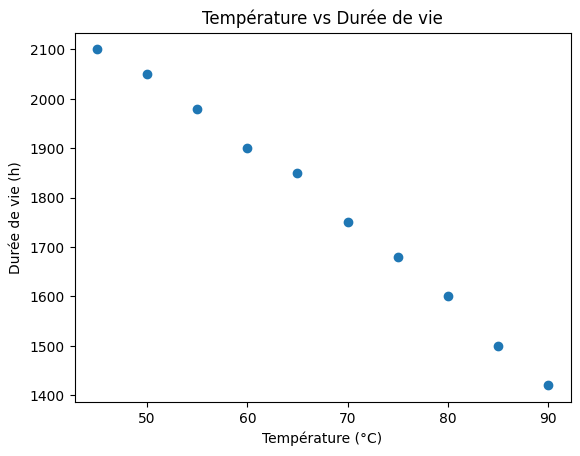

In [ ]:
plt.figure()
plt.scatter(temp, life)
plt.xlabel("Température (°C)")
plt.ylabel("Durée de vie (h)")
plt.title("Température vs Durée de vie")
plt.show()


In [ ]:
r, p = stats.pearsonr(temp, life)
print(f"Coefficient de corrélation de Pearson r = {r:.4f}")
print(f"p-value (test H0: rho = 0) = {p:.6g}")


Coefficient de corrélation de Pearson r = -0.9975
p-value (test H0: rho = 0) = 1.70229e-10


In [ ]:
alpha = 0.05

if p < alpha:
    print(f"Décision (alpha={alpha}): rejet de H0 (lien linéaire détectable).")
else:
    print(f"Décision (alpha={alpha}): on ne rejette pas H0 (pas de preuve de lien linéaire).")


Décision (alpha=0.05): rejet de H0 (lien linéaire détectable).


LinregressResult(slope=np.float64(-15.309090909090909), intercept=np.float64(2816.363636363636), rvalue=np.float64(-0.9975005769161214), pvalue=np.float64(1.7022917070202595e-10), stderr=np.float64(0.3834021976711447), intercept_stderr=np.float64(26.458918726306447))
Pente b = -15.309 h/°C
Intercept a = 2816.364 h
R^2 = 0.9950
p-value (test H0: b=0) = 1.70229e-10


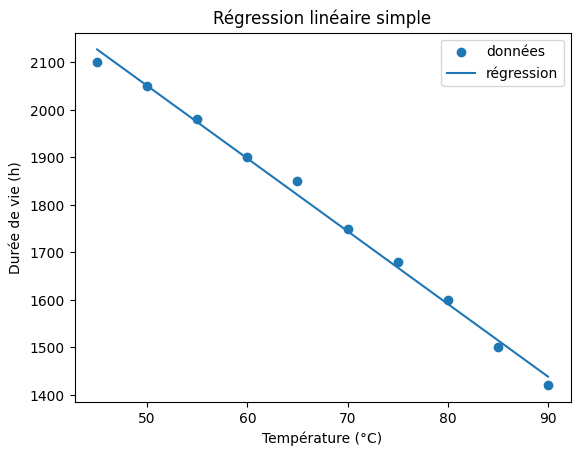

In [ ]:
lin = stats.linregress(temp, life)
print(lin)

print(f"Pente b = {lin.slope:.3f} h/°C")
print(f"Intercept a = {lin.intercept:.3f} h")
print(f"R^2 = {lin.rvalue**2:.4f}")
print(f"p-value (test H0: b=0) = {lin.pvalue:.6g}")

x_grid = np.linspace(temp.min(), temp.max(), 200)
y_hat = lin.intercept + lin.slope * x_grid

plt.figure()
plt.scatter(temp, life, label="données")
plt.plot(x_grid, y_hat, label="régression")
plt.xlabel("Température (°C)")
plt.ylabel("Durée de vie (h)")
plt.title("Régression linéaire simple")
plt.legend()
plt.show()


## Correction Exercice 4 – Corrélation de Pearson (température / durée de vie)

<details>
<summary><strong>1) Nature des variables et type de question</strong></summary>

- Variables mesurées :
  - Température (°C) → quantitative continue
  - Durée de vie (h) → quantitative continue
- On cherche à savoir s’il existe un **lien linéaire** entre ces deux variables.

Il ne s’agit pas :
- d’une comparaison de moyennes entre groupes,
- ni d’un avant/après,
mais d’une analyse de relation entre deux grandeurs mesurées.

</details>

---

<details>
<summary><strong>2) Paramètre étudié : $\rho$ vs $r$</strong></summary>

- $\rho$ : **corrélation populationnelle** (vrai lien linéaire dans la population), inconnue.
- $r$ : **corrélation observée** sur l’échantillon (calculée à partir des données), variable d’un échantillon à l’autre.

Objectif du test :
> déterminer si la valeur observée de $r$ est compatible avec l’absence de lien réel ($\rho=0$).

</details>

---

<details>
<summary><strong>3) Hypothèses statistiques $H_0$ et $H_1$</strong></summary>

Test standard (bilatéral) :
$$
H_0 : \rho = 0
$$
$$
H_1 : \rho \neq 0
$$

Interprétation :
- $H_0$ : pas de relation linéaire réelle (dans la population).
- $H_1$ : existence d’une relation linéaire réelle.

Remarque :
- on peut choisir un test unilatéral seulement si le sens est fixé avant (ex. on s’attend uniquement à une baisse).
- par défaut, on utilise le bilatéral.

</details>

---

<details>
<summary><strong>4) Test choisi et justification</strong></summary>

➡️ Test utilisé : **test de corrélation de Pearson**.

Justification :
- deux variables quantitatives,
- question sur un **lien linéaire**,
- l’outil donne :
  - une estimation $r$,
  - et une p-value associée au test $H_0:\rho=0$.

Conditions d’application (à vérifier qualitativement) :
- relation approximativement linéaire,
- pas d’outliers majeurs,
- données pas trop éloignées d’une distribution “raisonnable” (le test reste souvent robuste en pratique).

</details>

---

<details>
<summary><strong>5) Interprétation de $r$ (force et sens du lien)</strong></summary>

- Le signe de $r$ indique le sens :
  - $r < 0$ : relation négative (quand $x$ augmente, $y$ diminue)
  - $r > 0$ : relation positive

- La valeur absolue $|r|$ indique l’intensité du lien linéaire :
  - proche de 0 : lien linéaire faible
  - proche de 1 : lien linéaire fort

Lecture ingénieur :
- $r$ décrit une **association linéaire**, pas un mécanisme physique.

</details>

---

<details>
<summary><strong>6) Interprétation de la p-value</strong></summary>

La p-value répond à :

> Quelle est la probabilité d’observer une corrélation au moins aussi extrême que $r$  
> **si** la corrélation réelle était nulle ($\rho=0$) ?

- p-value < 0.05 :
  - un tel $r$ serait rare si $\rho=0$
  - on rejette $H_0$
  - → lien linéaire **statistiquement détectable**

- p-value > 0.05 :
  - un tel $r$ est plausible si $\rho=0$
  - on ne rejette pas $H_0$
  - → pas de preuve suffisante de lien linéaire

</details>

---

<details>
<summary><strong>7) Conclusion industrielle (ce qu’on peut dire / ne pas dire)</strong></summary>

### Ce que l’on peut conclure
- si p-value < 0.05 :
  - “Les données montrent une association linéaire significative entre température et durée de vie.”
  - le signe de $r$ indique si la durée de vie diminue ou augmente avec la température.
- on peut recommander d’explorer un modèle (régression) pour quantifier la sensibilité.

### Ce que l’on ne peut pas conclure (important)
- corrélation ≠ causalité :
  - température peut être corrélée à d’autres facteurs (charge, lubrification, vitesse, matériau, dispersion de fabrication…)
- le test ne prouve pas un mécanisme physique
- la relation peut ne pas être linéaire hors de la plage testée

### Exemple de formulation “rapport d’ingénieur”
> “Au seuil 5%, nous [rejetons / ne rejetons pas] $H_0 : \rho=0$.  
> La corrélation observée est $r=\dots$ (signe : …).  
> Cela indique une association linéaire [négative/positive] entre température et durée de vie sur la plage de températures testée.  
> Une étude complémentaire (régression + contrôle des facteurs confondants) est nécessaire pour conclure sur la causalité et établir une loi de dimensionnement.”

</details>

---

<details>
<summary><strong>8) Transition naturelle vers la régression</strong></summary>

- Le test de Pearson répond : “y a-t-il un lien linéaire ?”
- La régression répond : “quel est l’effet moyen (pente) et son incertitude ?”

En pratique :
- Pearson est un bon point d’entrée,
- puis on passe à la régression pour obtenir une relation exploitable (sensibilité, prédiction, IC sur la pente).

</details>


In [ ]:
##EX5
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

rpm = np.array([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800], dtype=float)
wear = np.array([0.18, 0.20, 0.22, 0.25, 0.27, 0.30, 0.33, 0.35, 0.38, 0.41], dtype=float)

len(rpm), len(wear)


(10, 10)

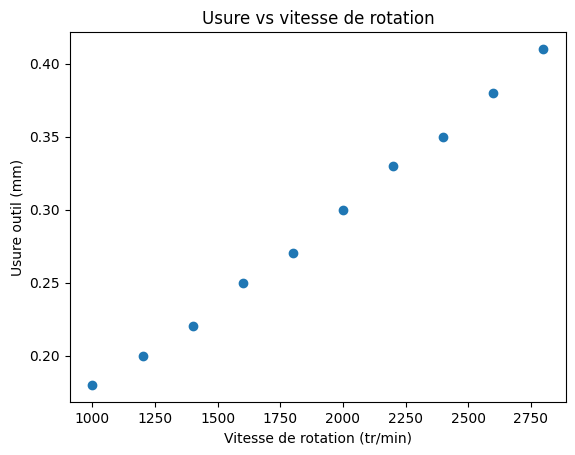

In [ ]:
plt.figure()
plt.scatter(rpm, wear)
plt.xlabel("Vitesse de rotation (tr/min)")
plt.ylabel("Usure outil (mm)")
plt.title("Usure vs vitesse de rotation")
plt.show()


In [ ]:
lin = stats.linregress(rpm, wear)

print(f"pente b = {lin.slope:.8f} mm/(tr/min)")
print(f"intercept a = {lin.intercept:.4f} mm")
print(f"R^2 = {lin.rvalue**2:.4f}")
print(f"p-value (test H0: b = 0) = {lin.pvalue:.6g}")
print(f"SE(b) = {lin.stderr:.8f}")


pente b = 0.00012879 mm/(tr/min)
intercept a = 0.0443 mm
R^2 = 0.9972
p-value (test H0: b = 0) = 1.74743e-11
SE(b) = 0.00000242


In [ ]:
alpha = 0.05
n = len(rpm)
df = n - 2  # ddl en régression simple

tcrit = stats.t.ppf(1 - alpha/2, df=df)
b = lin.slope
se_b = lin.stderr

ci_b = (b - tcrit*se_b, b + tcrit*se_b)
print(f"IC 95% sur la pente b : [{ci_b[0]:.8f}, {ci_b[1]:.8f}]")


IC 95% sur la pente b : [0.00012320, 0.00013438]


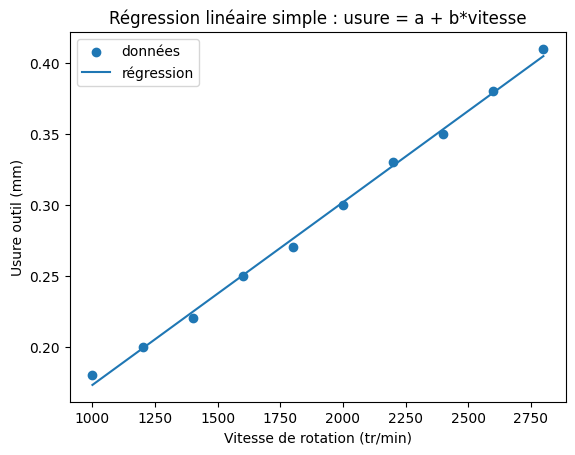

In [ ]:
x_grid = np.linspace(rpm.min(), rpm.max(), 200)
y_hat = lin.intercept + lin.slope * x_grid

plt.figure()
plt.scatter(rpm, wear, label="données")
plt.plot(x_grid, y_hat, label="régression")
plt.xlabel("Vitesse de rotation (tr/min)")
plt.ylabel("Usure outil (mm)")
plt.title("Régression linéaire simple : usure = a + b*vitesse")
plt.legend()
plt.show()


In [ ]:
X = sm.add_constant(rpm)  # colonne constante pour l'intercept
model = sm.OLS(wear, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2822.
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           1.75e-11
Time:                        10:29:14   Log-Likelihood:                 41.179
No. Observations:                  10   AIC:                            -78.36
Df Residuals:                       8   BIC:                            -77.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0443      0.005      9.207      0.0

In [ ]:
a_hat, b_hat = model.params
p_b = model.pvalues[1]
ci = model.conf_int(alpha=0.05)  # IC 95% sur (a, b)

print(f"intercept a_hat = {a_hat:.4f} mm")
print(f"pente b_hat = {b_hat:.8f} mm/(tr/min)")
print(f"p-value (test H0: b = 0) = {p_b:.6g}")
print(f"IC 95% sur b : [{ci[1,0]:.8f}, {ci[1,1]:.8f}]")
print(f"R^2 = {model.rsquared:.4f}")


intercept a_hat = 0.0443 mm
pente b_hat = 0.00012879 mm/(tr/min)
p-value (test H0: b = 0) = 1.74743e-11
IC 95% sur b : [0.00012320, 0.00013438]
R^2 = 0.9972


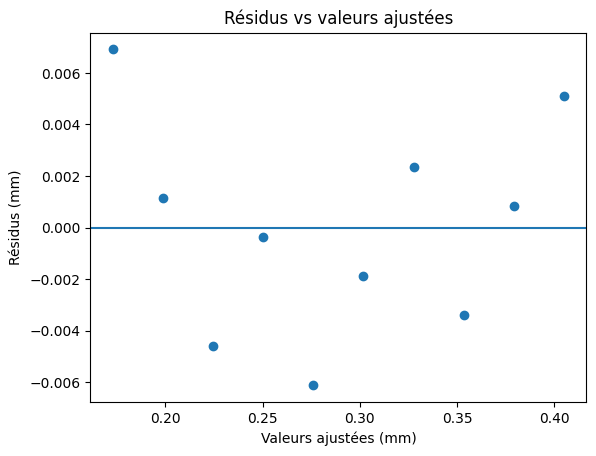

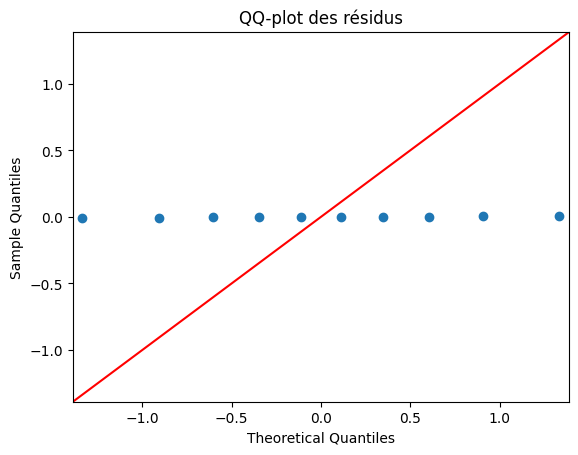

In [ ]:
resid = model.resid
fitted = model.fittedvalues

plt.figure()
plt.scatter(fitted, resid)
plt.axhline(0)
plt.xlabel("Valeurs ajustées (mm)")
plt.ylabel("Résidus (mm)")
plt.title("Résidus vs valeurs ajustées")
plt.show()

sm.qqplot(resid, line="45")
plt.title("QQ-plot des résidus")
plt.show()


In [ ]:
alpha = 0.05
direction = "augmente" if b_hat > 0 else "diminue"

print(f"Interprétation : la pente estimée est b = {b_hat:.3e} mm/(tr/min).")
print(f"Donc l’usure {direction} en moyenne lorsque la vitesse augmente (dans la plage étudiée).")

if p_b < alpha:
    print(f"Au seuil {alpha*100:.0f}%, on rejette H0: b=0 → effet linéaire détectable.")
else:
    print(f"Au seuil {alpha*100:.0f}%, on ne rejette pas H0: b=0 → effet linéaire non démontré.")

print("Attention : validité limitée à la plage de vitesses testée ; corrélation ≠ causalité.")


Interprétation : la pente estimée est b = 1.288e-04 mm/(tr/min).
Donc l’usure augmente en moyenne lorsque la vitesse augmente (dans la plage étudiée).
Au seuil 5%, on rejette H0: b=0 → effet linéaire détectable.
Attention : validité limitée à la plage de vitesses testée ; corrélation ≠ causalité.


## Correction Exercice 5 – Test t sur la pente (régression linéaire) : démarche et interprétation

<details>
<summary><strong>1) Nature des variables et type de modèle</strong></summary>

- Variables :
  - Vitesse de rotation (tr/min) → quantitative continue
  - Usure outil (mm) → quantitative continue
- Objectif : quantifier l’influence de la vitesse sur l’usure.

Un modèle simple adapté (première approche) est une relation linéaire :
$$
\text{Usure} = a + b \cdot \text{Vitesse} + \varepsilon
$$

- $a$ : usure “de base” extrapolée (intercept)
- $b$ : **sensibilité** de l’usure à la vitesse (unité : mm/(tr/min))
- $\varepsilon$ : variabilité expérimentale (bruit, dispersion procédé, mesure)

</details>

---

<details>
<summary><strong>2) Traduction de la question industrielle</strong></summary>

Question industrielle :
> “La vitesse de rotation a-t-elle un effet réel (linéaire) sur l’usure, ou l’évolution observée peut-elle être due au hasard ?”

Traduction statistique :
- on cherche à savoir si la pente $b$ est différente de zéro.
- “absence d’effet linéaire” correspond à $b=0$.

</details>

---

<details>
<summary><strong>3) Hypothèses statistiques $H_0$ et $H_1$</strong></summary>

Test standard (bilatéral) :
$$
H_0 : b = 0
$$
$$
H_1 : b \neq 0
$$

Interprétation :
- $H_0$ : pas d’effet linéaire détectable de la vitesse sur l’usure.
- $H_1$ : effet linéaire détectable.

Option unilatérale (uniquement si décidé avant analyse) :
- si on est certain que l’usure ne peut qu’augmenter avec la vitesse :
$$
H_1 : b > 0
$$

</details>

---

<details>
<summary><strong>4) Quel test ? Pourquoi “test t sur la pente” ?</strong></summary>

Dans une régression linéaire, la pente estimée $\hat{b}$ est une estimation basée sur l’échantillon.

On teste si $\hat{b}$ est suffisamment éloignée de 0 au regard de son incertitude :
$$
t_{\text{obs}} = \frac{\hat{b}}{\text{SE}(\hat{b})}
$$

Sous $H_0 : b=0$, cette statistique suit une loi de Student (avec $n-2$ degrés de liberté en régression simple).
Cela permet de calculer une p-value.

➡️ C’est exactement le “test t de la pente”.

</details>

---

<details>
<summary><strong>5) Comment interpréter la pente $b$ (sens physique + unité)</strong></summary>

- Le signe de $\hat{b}$ donne le sens :
  - $\hat{b} > 0$ : l’usure augmente avec la vitesse
  - $\hat{b} < 0$ : l’usure diminue avec la vitesse (rare ici, mais possible selon mécanismes)

- L’unité est essentielle :
  - ici : mm/(tr/min)

Lecture ingénieur :
> “Quand la vitesse augmente de 1000 tr/min, l’usure moyenne varie d’environ $1000 \cdot \hat{b}$ mm.”

Cela permet de juger l’importance technique de l’effet.

</details>

---

<details>
<summary><strong>6) Interprétation de la p-value (test $H_0:b=0$)</strong></summary>

La p-value répond à :
> Quelle est la probabilité d’obtenir une pente estimée au moins aussi extrême que $\hat{b}$  
> si en réalité la pente était nulle ($b=0$) ?

- p-value < 0.05 :
  - une telle pente serait rare si $b=0$
  - on rejette $H_0$
  - → **effet linéaire détectable** de la vitesse sur l’usure

- p-value > 0.05 :
  - la pente observée est plausible sous $b=0$
  - on ne rejette pas $H_0$
  - → effet non démontré avec ces données

</details>

---

<details>
<summary><strong>7) Intervalle de confiance (IC 95%) sur la pente</strong></summary>

Un IC 95% sur $b$ donne une plage de sensibilités compatibles avec les données.

Lecture directe :
- si l’IC 95% contient 0 → cohérent avec $b=0$ → p-value > 0.05 (bilatéral)
- si l’IC 95% ne contient pas 0 → $b$ différent de 0 → p-value < 0.05

Interprétation ingénieur :
- l’IC quantifie l’incertitude sur l’effet
- il permet d’évaluer un “pire cas” et un “meilleur cas” en termes de sensibilité

</details>

---

<details>
<summary><strong>8) Ce que $R^2$ apporte (et ses limites)</strong></summary>

- $R^2$ indique la part de variabilité de $y$ expliquée par le modèle linéaire.
- Un $R^2$ élevé ne prouve pas la causalité.
- Un $R^2$ modéré peut néanmoins coexister avec une pente significative si l’échantillon est informatif.

Lecture ingénieur :
- $R^2$ parle de “qualité d’ajustement”
- le test sur $b$ parle de “présence d’un effet linéaire détectable”
Ce sont deux informations complémentaires.

</details>

---

<details>
<summary><strong>9) Conclusion industrielle attendue (exemple de rédaction)</strong></summary>

Une conclusion de rapport doit inclure :

1) Décision statistique :
> “Au seuil 5%, nous [rejetons / ne rejetons pas] $H_0 : b=0$.”

2) Quantification :
> “La pente estimée est $\hat{b} = \dots$ mm/(tr/min) avec un IC 95% : $[\dots ; \dots]$.”

3) Sens métier :
> “Dans la plage 1000–2800 tr/min, l’usure augmente d’environ $\Delta \text{Usure} \approx \hat{b}\,\Delta \text{Vitesse}$.
Cet effet est [faible/modéré/important] au regard des critères de remplacement outil et de la qualité pièce.”

4) Limites :
- validité limitée à la plage testée
- autres facteurs possibles (avance, lubrification, matériau, effort de coupe, etc.)
- besoin éventuel d’un plan d’expériences si l’objectif est l’optimisation multi-paramètres

</details>

---

<details>
<summary><strong>10) Transition vers l’ingénierie de la conception</strong></summary>

Une fois la pente validée :
- on peut utiliser le modèle pour estimer un compromis (performance / usure),
- intégrer des marges,
- proposer une fenêtre de fonctionnement,
- ou définir des essais complémentaires (DOE) pour isoler les facteurs.

</details>
